In [1]:
import fastai
from fastai import *
from fastai.text import * 

import pandas as pd
import numpy as np

from functools import partial

from google.colab import drive 

from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [9]:
df = pd.read_csv('gdrive/MyDrive/data/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
df.columns = ['text', 'target']
columns_titles = ['target', 'text']
df=df.reindex(columns=columns_titles)

In [4]:
df.shape

(1000, 2)

In [5]:
df.head()

,target,text
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...


In [6]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [7]:
df.head()

,target,text
0,1,Wow Loved this place
1,0,Crust is not good
2,0,Not tasty and the texture was just nasty
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...


In [10]:
train, val = train_test_split(df, stratify = df['target'], test_size = 0.3, random_state = 12)

In [11]:
data_lm = TextLMDataBunch.from_df(train_df = train, valid_df = val, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [12]:
data_lm = TextLMDataBunch.from_df(train_df = train, valid_df = val, path = "")

lang_mod = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=1.)

lang_mod.fit_one_cycle(3, max_lr= 5e-02)
lang_mod.freeze_to(-1)
lang_mod.fit_one_cycle(2, slice(1e-2/(2.6**4), 1e-2))
lang_mod.freeze_to(-2)
lang_mod.fit_one_cycle(2, slice(3e-3/(2.6**4), 1e-3))
lang_mod.unfreeze()
lang_mod.fit_one_cycle(2, slice(3e-3/(2.6**4), 1e-3))

lang_mod.save_encoder('encoder')

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


epoch,train_loss,valid_loss,accuracy,time
0,5.088562,4.007307,0.220647,00:00
1,4.539142,3.556709,0.208482,00:00
2,4.179793,3.480420,0.215290,00:00


epoch,train_loss,valid_loss,accuracy,time
0,3.427538,3.324271,0.275781,00:00
1,3.346688,3.277326,0.289062,00:00


epoch,train_loss,valid_loss,accuracy,time
0,3.246875,3.230824,0.320871,00:00
1,3.190541,3.204448,0.336161,00:00


epoch,train_loss,valid_loss,accuracy,time
0,3.134089,3.178513,0.337946,00:00
1,3.127868,3.159494,0.340179,00:00


In [13]:
data_clas = TextClasDataBunch.from_df(path = "", train_df = train,  valid_df = val, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [14]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


text,target
"xxbos xxmaj hot dishes are not hot , cold dishes are close to room xxunk . i watched staff xxunk food with xxup xxunk xxup xxunk , no xxunk . xxmaj everything is xxunk fried in xxunk .",0
"xxbos xxmaj the xxunk said "" yum yum sauce "" and another said "" xxunk sauce "" , yet another said "" spicy xxunk ... well xxup none of the xxunk had xxunk on them .",0
"xxbos a drive xxunk means you do not want to wait around for half an hour for your food , but xxunk when we xxunk up going here they make us wait and wait .",0
xxbos xxmaj so good i am going to have to review this place twice - once xxunk a tribute to the place and once as a tribute to an xxunk xxunk here last night .,1
xxbos xxmaj the xxunk i have is that they xxunk $ xxunk for a sandwich that is no xxunk than a xxmaj subway sub ( which offers better and more amount of vegetables ) .,0


In [15]:
learn_classifier = text_classifier_learner(data_clas, drop_mult=0.5, arch = AWD_LSTM)

In [16]:
learn_classifier.load_encoder('encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (700 items)
x: TextList
xxbos xxmaj dessert : xxmaj xxunk xxmaj xxunk was amazing .,xxbos i liked the patio and the service was outstanding .,xxbos xxmaj the salad had just the right amount of sauce to not over xxunk the scallop , which was perfectly cooked .,xxbos xxmaj they really want to make your experience a good one .,xxbos xxmaj it took over 30 xxunk to get their xxunk , which was nothing more than xxunk xxunk .
y: CategoryList
1,1,1,1,0
Path: .;

Valid: LabelList (300 items)
x: TextList
xxbos xxmaj this really is how xxmaj vegas xxunk dining used to be , right down to the xxunk xxunk to the xxunk that have no prices xxunk .,xxbos xxmaj service is quick and even " to go " xxunk are just like we like it !,xxbos xxmaj the xxunk xxunk was not only xxunk , but xxunk and tasteless .,xxbos xxmaj also , the fries are xxunk a xxunk the worst fries i 've ever had .,xxbos xxmaj the staff are also very friendly and xxunk .
y: CategoryLis

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 2.51E-02


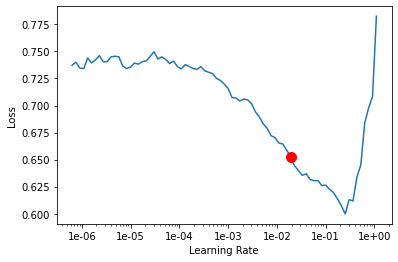

In [17]:
learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

In [21]:
learn_classifier.fit_one_cycle(2, max_lr=1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.474417,0.455036,0.790000,00:00
1,0.443046,0.415048,0.810000,00:00


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

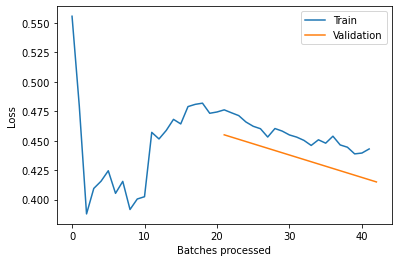

In [22]:
learn_classifier.recorder.plot_losses()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.63E-04


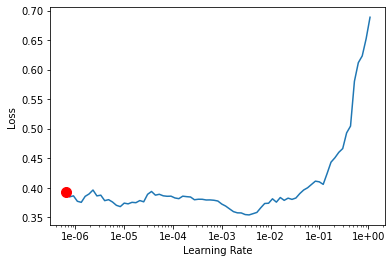

In [23]:
learn_classifier.unfreeze()

learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

In [24]:
learn_classifier.fit_one_cycle(2, max_lr=1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.513366,0.397520,0.793333,00:01
1,0.377837,0.370941,0.850000,00:01


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [25]:
pred_class,pred_idx,outputs = learn_classifier.predict('we watched our waiter pay a lot more attention to other tables and ignore us')
learn_classifier.data.classes[to_data(pred_class)]

0

In [26]:
valid_preds, valid_label=learn_classifier.get_preds(ds_type=DatasetType.Valid, ordered=True)
valid_preds.shape

torch.Size([300, 2])

In [27]:
preds=valid_preds.numpy()
print(np.mean(preds[:,0]))
print(np.mean(preds[:,1]))

0.508696
0.49130395


In [28]:
val_target=preds[:,1]>0.5

In [29]:
df_val_pred=pd.DataFrame({'text':val.text, 'target':val.target, 'pred_target':val_target, 'not_like_score':preds[:,1]})

In [30]:
pd.crosstab(df_val_pred.target, df_val_pred.pred_target)

pred_target,False,True
target,,
0,130,20
1,25,125


In [31]:
df_val_pred.sort_values(['target','pred_target'])

,text,target,pred_target,not_like_score
59,"The ripped banana was not only ripped, but pet...",0,False,0.022069
321,"Also, the fries are without a doubt the worst ...",0,False,0.015344
709,"I mean really, how do you get so famous for yo...",0,False,0.161113
412,"For service, I give them no stars.",0,False,0.095890
792,Paying $7.85 for a hot dog and fries that look...,0,False,0.110478
...,...,...,...,...
38,My first visit to Hiro was a delight!,1,True,0.623991
375,Best tacos in town by far!!,1,True,0.938867
922,"Every time I eat here, I see caring teamwork t...",1,True,0.608785
65,"Great food and service, huge portions and they...",1,True,0.990417
